# **Introduction** <a name="introduction"></a>

This notebook will demonstrate the creation of a machine learning model while covering all features provided by IBM AI Factsheet. The demonstration will include key functionalities such as:

- **Trace and Customize Training Run:** Track and modify the training process to suit your specific needs.
- **Export Training Facts:** Export detailed information about the training process for further analysis.
- **Additional Training Information:** Capture and manage supplementary data related to the training run.
- **Custom Facts:** Define and track custom facts that are important for your model's lifecycle.
- **Attachments:** Add and manage attachments related to the training process, such as datasets, logs, or reports.
- **Capture Cell Facts:** Capture and store facts directly from specific cells in your notebook.
- **Governing AI Assets:** Ensure proper governance of AI models, including compliance with regulations and policies.

For detailed documentation on these features, please refer to the [IBM AI Factsheet documentation](https://s3.us.cloud-object-storage.appdomain.cloud/factsheets-client/index.html).

#### **Tree Visualization with DtreeViz**
To visualize decision trees, you need to install the `dtreeviz` package. Detailed installation instructions can be found [here](https://github.com/parrt/dtreeviz).


**Required Services:**
- `watsonx.governance`
- `watsonx.ai`

**Required Packages:**
- **IBM Facts Client Python SDK (>=1.0.47)**
- **IBM-watsonx-ai Python SDK**



<a name="setupcloud"></a>

In [ ]:
!pip install -q dtreeviz
!pip install wget --quiet
!pip install -U python-dotenv --quiet
!pip install ibm-aigov-facts-client
!pip install -U ibm-watsonx-ai --quiet

In [ ]:
import warnings
import wget
import shutil
import time
import os
from dotenv import load_dotenv
from IPython.core.display import display, Markdown
from ibm_aigov_facts_client import AIGovFactsClient,CloudPakforDataConfig

warnings.filterwarnings('ignore')
shutil.rmtree('./mlruns', ignore_errors=True)
load_dotenv()

- This sample will use IBM Cloud by default. If you prefer to IBM watsonx.goverance software, set `use_software=True`
- Flag `run_cleanup_at_end` offers option to delete created assets at the end of the notebook.The notebook will show URL to UI for model and model use case at certain cells. By dafault we set it to `run_cleanup_at_end=False` so you can access UI and see the changes. If you decide to cleanup assets at the end, set `run_cleanup_at_end=True` and remember cells showing links to UI will `NOT` work in that case.

In [3]:
use_software=True
run_cleanup_at_end=True

- `Experiment` and `model names` can be customized.
- Model container type can be `space` or `project`. However to use get/set environment utilities in this notebook, model asset need to be promoted to Space first.

In [ ]:
MODEL_NAME="Iris Watsonx-ai Model"
experiment_name="External Model"
container_type=os.getenv("CONTAINER_TYPE", "<if you can't use .env you can provide your value here>")
container_id=os.getenv("CONTAINER_ID", "<if you can't use .env you can provide your value here>") # Project_id where the model has to store 

---
## Authentication Setup<a name="setup"></a>

### IBM Cloud  <a name="IBM-Cloud"></a>

Your Cloud API key can be generated by going to the Users section of the Cloud console. From that page, go to **Manage->Access(IAM)->API keys-> Create**. Give your key a name and click Create, then copy the created key and use as API_KEY.

NOTE: You can also get OpenScale API_KEY using IBM CLOUD CLI.

How to install IBM Cloud (bluemix) console: instruction

How to get api key using console:

```
bx login --sso
bx iam api-key-create 'my_key'
```
- Get relevant space id from UI `(Deployments -> Spaces-> open space -> Manage -Space GUID)`

In [4]:
if not use_software:
    API_KEY=os.getenv("CLOUD_API_KEY", "<if you can't use .env you can provide your value here>")

[back to top](#introduction)
### IBM watsonx.goverance software<a name="Watsonx.Gov-Platform"></a>

- Service url is the watsonx.goverance software platform host URL. For skytap environment, it would be the internal nginx URL.
- You can either use user `password` or platform `apikey` to authenticate

In [5]:
if use_software:
    creds=CloudPakforDataConfig(service_url=os.getenv("CPD_SERVICE_URL", "<if you can't use .env you can provide your value here>"),
        username=os.getenv("CPD_USERNAME", "<if you can't use .env you can provide your value here>"),
        password=os.getenv("CPD_PASSWORD", "<if you can't use .env you can provide your value here>"))


## Client Initialization
- Container type would be either `space` or `project`. To use get/set environment utilities, model asset should be stored in Space.
- If running this notebook multiple times with same experiment name or anytime face error saying `Experiment with same name already exists`, use `set_as_current_experiment=True` when initiating client





In [7]:
if use_software:
   facts_client = AIGovFactsClient(cloud_pak_for_data_configs=creds,experiment_name= experiment_name, container_type=container_type,container_id=container_id, set_as_current_experiment=True)
else: 
   facts_client = AIGovFactsClient(api_key=API_KEY, experiment_name= experiment_name, container_type=container_type,container_id=container_id, set_as_current_experiment=True)

In [9]:
facts_client.version

'1.0.60'

---

## Create and Train Model <a name="#createmodel"></a>

- This sample code demonstrates creating and training a model, specifically a classifier.
- Model development is achieved without writing any IBM or watsonx.governance-specific code.
- Key training facts are automatically captured in the background and can be saved to a factsheet later.


In [10]:
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np

## Get testdata for iris.
iris=datasets.load_iris()

x=iris.data
y=iris.target

## Split training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.5)

### Train Model

The following code will be used to train the model. During the training process, key facts and metrics will be automatically captured in the background by the `IBM watsonx.governance` factsheets client. These facts can later be saved and reviewed in a factsheet.

**Note:** Although there is no need to include any specific `IBM watsonx.governance` code for this process, you will still observe output



In [12]:
## Train model
classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)

#This is the main training method. No watxonx.governance code is directly needed but as you can see from the output the training details are logged
predictions=classifier.predict(x_test)

## Check accuracy for the model
print(accuracy_score(y_test,predictions))

2023/10/05 14:13:42 INFO : logging results to factsheet for run_id c9ff570eb41b42098d25f1a423e02f3a
2023/10/05 14:13:45 INFO : Successfully logged results to Factsheet service for run_id c9ff570eb41b42098d25f1a423e02f3a under asset_id: f4d2322e-b328-446d-ab02-119b3e83c58c and project_id : 55f80411-ed6b-4bca-8655-0d32d37f7df1
0.96


---
## Trace and Customize Training Runs<a name="extrametrics"></a>

Before saving the model, you have the option to log additional metrics, parameters, and tags associated with the run ID. If you prefer not to add any extra information, you can skip this section and proceed directly to the **Store Model** section.

For more details on logging additional information, refer to the [Trace and Customize Training Runs Documentation](https://s3.us.cloud-object-storage.appdomain.cloud/aifactsheets-client/doc_files/asset_model/Model/Basic%20Utilities.html#).




#### List all active experiments.


In [15]:
facts_client.experiments.list_experiments()

,experiment_id,name,tags,location
0,1,iris_model_experiment,{},file:///Users/shashidhar/1_1_Factsheet_Python/...


#### Retrieve Current Experiment ID


In [16]:
current_exp_ID = facts_client.experiments.get_current_experiment_id()
current_exp_ID


'1'

In [17]:
facts_client.runs.list_runs_by_experiment(current_exp_ID)

,run_id,experiment_id,published,artifact_uri,start_time,end_time
0,c9ff570eb41b42098d25f1a423e02f3a,1,True,file:///Users/shashidhar/1_1_Factsheet_Python/...,2023-10-05 08:43:42.476000+00:00,2023-10-05 08:43:45.436000+00:00


#### Retrieve Current Run ID

In [ ]:
current_run_ID = facts_client.runs.get_current_run_id()
current_run_ID

'c9ff570eb41b42098d25f1a423e02f3a'

#### <span style="color: gold;">Log Metrics, Parameters, and Tags for the Current Run</span>


In [19]:
facts_client.runs.log_metric(current_run_ID,"mae",0.77)
#facts_client.runs.log_metrics(current_run_ID,{"mse": 2000.00, "rmse": 50.00})

facts_client.runs.log_param(current_run_ID,"curve",1)
#facts_client.runs.log_params(current_run_ID,{"n_estimators": 3, "random_state": 42})

facts_client.runs.set_tags(current_run_ID, {"Notebook name": "sample notebook", "Notebook id": "sample_id"})


2023/10/05 14:13:46 INFO : Initiating logging to factsheet for run_id......c9ff570eb41b42098d25f1a423e02f3a
2023/10/05 14:13:48 INFO : Successfully logged results to Factsheet service for run_id c9ff570eb41b42098d25f1a423e02f3a under asset_id: f4d2322e-b328-446d-ab02-119b3e83c58c and project_id : 55f80411-ed6b-4bca-8655-0d32d37f7df1


#### Export Individual Run to Factsheet Service


In [ ]:
facts_client.export_facts.export_payload(current_run_ID)

---
## Store Model as a watsonx.ai / WML Asset in Project <a name="#savemodel"></a>

At present, the model exists solely as a Scikit-Learn object in memory. The subsequent step is to register it as a watsonx.ai / WML asset.

In a **Cloud environment**, please use the watsonx.ai / WML URL specific to your region:

- Dallas (US-South): `https://us-south.ml.cloud.ibm.com`

For IBM internal environments, the following watsonx.ai / WML URLs are applicable:

- ypqa: `https://us-south.ml.test.cloud.ibm.com`
- dev: `https://wml-fvt.ml.test.cloud.ibm.com`


In [20]:
from ibm_watsonx_ai import APIClient
from ibm_watsonx_ai import Credentials


if use_software:
       Credentials = {
                   "url": creds.url,
                   "username": creds.username,
                   "password" : creds.password,
                   "instance_id": "openshift",
                   "version" : "4.8"
                  }
else:
       Credentials = {
                     "url": "https://us-south.ml.cloud.ibm.com",
                     "apikey": API_KEY
              }

In [21]:
watsonx_ai_client = APIClient(Credentials)
watsonx_ai_client.version
watsonx_ai_client.set.default_project(container_id)

'SUCCESS'

### Define and Prepare Model Metadata for watsonx.ai / WML

The following code defines the software specification and model properties, and prepares the model metadata for registration with watsonx.ai / WML.


In [22]:
software_spec_uid = watsonx_ai_client.software_specifications.get_id_by_name("runtime-23.1-py3.10")
print("Software Specification ID: {}".format(software_spec_uid))

model_props = {
    watsonx_ai_client._models.ConfigurationMetaNames.NAME:"{}".format(MODEL_NAME),
    watsonx_ai_client._models.ConfigurationMetaNames.TYPE: "scikit-learn_1.1",
    watsonx_ai_client._models.ConfigurationMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
    watsonx_ai_client._models.ConfigurationMetaNames.LABEL_FIELD:"target",
}

facts_client.export_facts.prepare_model_meta(wml_client=watsonx_ai_client,meta_props=model_props)



Software Specification ID: b56101f1-309d-549b-a849-eaa63f77b2fb


{'name': 'Iris_model',
 'type': 'scikit-learn_1.1',
 'software_spec': 'b56101f1-309d-549b-a849-eaa63f77b2fb',
 'label_column': 'target',
 'custom': {'experiment_id': 'b03dd0c38e3c4729b6dfed0393afc797',
  'experiment_name': 'iris_model_experiment'}}

### Store Model and Retrieve Model ID

The following code stores the model in watsonx.ai / WML and retrieves its unique model ID.


In [23]:
print("Storing model .....")

published_model_details = watsonx_ai_client.repository.store_model(model=classifier, meta_props=model_props, training_data=x_train, training_target=y_train)
model_id = watsonx_ai_client.repository.get_model_id(published_model_details)
print("Done")
print("Model ID: {}".format(model_id))

Storing model .....
Done
Model ID: 54e5499d-753e-4c15-b4e4-8a70cd263fc2


---
## Retrieve Saved Model with Factsheet Client

The model, saved using watsonx.ai / WML methods, includes comprehensive training documentation in the factsheet. 
Although additional information can be manually added, such as diagrams, this is beyond the scope of this notebook.

To associate the model with an AI use case, retrieve it using the `assets.get_model()` method:

- Use `verbose=True` for detailed information.
- Retrieve the model by `model_id` with:
  - facts_client.assets.`get_model(model_id=<wml_model_id>)`
  
  - facts_client.assets.`get_model(model_id=<wml_model_id>, container_type=<space_or_project>, container_id=<space_or_project_id>)`


In [24]:
watsonx_ai_model=facts_client.assets.get_model(wml_stored_model_details=published_model_details)
watsonx_ai_model.get_info(verbose=True)

2023/10/05 14:14:15 INFO : Current model information: {'asset_id': '54e5499d-753e-4c15-b4e4-8a70cd263fc2', 'container_type': 'project', 'container_id': '55f80411-ed6b-4bca-8655-0d32d37f7df1', 'facts_type': 'modelfacts_user'}


{'name': 'Iris_model',
 'asset_type': 'wml_model',
 'url': 'https://cpd-aigov.apps.fs-480-dev.cp.fyre.ibm.com/ml/models/54e5499d-753e-4c15-b4e4-8a70cd263fc2?projectid=55f80411-ed6b-4bca-8655-0d32d37f7df1&context=cpdaas',
 'asset_id': '54e5499d-753e-4c15-b4e4-8a70cd263fc2',
 'container_type': 'project',
 'container_id': '55f80411-ed6b-4bca-8655-0d32d37f7df1',
 'facts_type': 'modelfacts_user'}

In [ ]:
model_ui_url = watsonx_ai_model.get_info(verbose=True)["url"]
display(Markdown("[Click here to see the created model asset and it's factsheet in the UI](" + model_ui_url + ")"))



---
## Creation of New AI Use Case <a href="#add_mut"></a>

An **AI Use Case** tracks model asset lifecycles across environments like development, pre-production, and production. 

**Note:** The term "AI Use Case" has replaced "Model Use Case" to reflect a broader range of AI assets. While some APIs may still use the old terminology, it will be phased out.

- If `ai_usecase_id` is not provided, the default inventory_id is used (requires `EDITOR` access).

- Retrieve the AI Use Case ID from the URL in inventory or by using `get_ai_usecase()`.

- For Cloud Pak for Data, ensure OpenPages integration is disabled (create inventory permission needed).


### Create AI usecase  <a name="createusecase"></a>

In [ ]:
ai_usecase_inventory_id = os.getenv("INVENTORY_ID", "<if you can't use .env you can provide your inventory id here>")
ai_usecase_name="Autmatic Iris classification"
ai_usecase_desc="AI usecase for iris classification"

In [ ]:
ai_usecase = facts_client.assets.create_ai_usecase(catalog_id=ai_usecase_inventory_id,name=ai_usecase_name,description=ai_usecase_desc)
ai_usecase.get_info(True)

### Retrive AI usecase  <a name="createusecase"></a>

In [ ]:
ai_usecase_id = os.getenv("ai_usecase_id", "<if you can't use .env you can provide your inventory id here>")
ai_usecase_inventory_id = os.getenv("INVENTORY_ID", "<if you can't use .env you can provide your inventory id here>")



In [ ]:
ai_usecase = facts_client.assets.get_ai_usecase(ai_usecase_id=ai_usecase_id,catalog_id=ai_usecase_inventory_id )


In [ ]:
ai_usecase.get_info(True)  

In [ ]:
print("Model usecase name is {}".format(ai_usecase.get_name()))
print("Model usecase ID is {}".format(ai_usecase.get_id()))

---
## Working with Custom Facts <a name="customfactsdefmodel"></a>

- Ensure you have manage catalog permissions.
- Define the "slots" or "schema" by specifying the name, ID, and type for each fact slot you want to add to a model or ai use case.
- Custom facts definitions are global attributes visible in your account. By default, they are created under `modelfacts_user` for the model asset. Alternatively, use `model_entry_user` for definitions under a ai use case.
- Custom facts can be of type string, integer, or date.
- If defining a list of strings, set the attribute’s definition property `is_array` to True.
- For detailed information on options, refer to the [documentation](https://s3.us.cloud-object-storage.appdomain.cloud/aifactsheets-client/doc_files/asset_model/Model/Model%20Custom%20Facts.html).


## <span style="color: gold;">Custom Facts for Model</span>

This section covers how to define custom facts for a model. Custom facts allow you to add specific, relevant information about your model that isn't covered by standard metrics or reports.

In [25]:
!rm Asset_type_definition.csv
wget.download("https://raw.githubusercontent.com/IBM/ai-governance-factsheet-samples/main/Assets/data/Asset_type_definition.csv")

In [26]:
pd.read_csv('Asset_type_definition.csv')

,name,type,description,placeholder,is_array,required,hidden,readonly,default_value,label,minimum,maximum,min_length,max_length,is_searchable
0,TrainingData_Size,integer,Number of records in the training data,desc of userattrstr,False,True,False,False,0,TrainingData_Size,NaN,NaN,NaN,NaN,True
1,TrainingData_Ratio,string,Percentage of records in the training data,Percentage of records in the training data,False,True,False,False,0,TrainingData_Ratio,NaN,NaN,NaN,NaN,True
2,TestData_Size,integer,desc of userattrint,desc of userattrint,False,True,False,False,0,TestData_Size,NaN,NaN,NaN,NaN,False
3,TestData_Ratio,string,Percentage of records in the test data,Percentage of records in the test data,False,True,False,False,0,TestData_Ratio,NaN,NaN,NaN,NaN,True
4,Train_Class_Distributions,string,class distributions,class distributions,True,True,False,False,0,Train_Class_Distributions,NaN,NaN,NaN,NaN,False


### Add Custom Facts Defintion to Model.

This section describes how to add custom facts defintion or additional details defintion to a model. 

To include custom facts defintion in an Model, specify the type name as `modelfacts_user`. This ensures that the custom facts are accurately associated with the intended model.

**`overwrite`**: This optional parameter determines whether to merge the new definitions with or replace the existing properties. The default setting is `True`, which means that existing properties will be replaced by the new ones.










In [27]:
facts_client.assets.create_custom_facts_definitions("Asset_type_definition.csv",overwrite=True)
time.sleep(5)

2023/10/05 14:14:17 INFO : Creating definitions for type modelfacts_user
2023/10/05 14:14:20 INFO : Custom facts definitions updated Successfully


### Get Custom Facts Definitions <a name="getcustomfactsdefmodel"></a>

- Retrieves all custom fact definitions that have been set.
- Custom facts are defined globally and are available as slots on every model within the `same environment`.



In [28]:
facts_client.assets.get_facts_definitions(type_name="modelfacts_user")

{'description': 'The model fact user asset type to capture user defined attributes.',
 'fields': [{'key': 'TrainingData_Size',
   'type': 'integer',
   'facet': False,
   'is_array': False,
   'search_path': 'TrainingData_Size',
   'is_searchable_across_types': False},
  {'key': 'TrainingData_Ratio',
   'type': 'string',
   'facet': False,
   'is_array': False,
   'search_path': 'TrainingData_Ratio',
   'is_searchable_across_types': False},
  {'key': 'TestData_Ratio',
   'type': 'string',
   'facet': False,
   'is_array': False,
   'search_path': 'TestData_Ratio',
   'is_searchable_across_types': False}],
 'relationships': [],
 'properties': {'TrainingData_Size': {'type': 'integer',
   'description': 'Number of records in the training data',
   'placeholder': 'desc of userattrstr',
   'is_array': False,
   'required': True,
   'hidden': False,
   'readonly': False,
   'validated': False,
   'displayInChild': False,
   'restricted': False,
   'default_value': 0,
   'minimum': '',
   'ma

### Set Custom Facts <a name="setfactsmodel"></a>

This function sets the values for the custom fact defined earlier.


In [30]:
watsonx_ai_model.set_custom_fact(fact_id="TrainingData_Size",value=5000)
watsonx_ai_model.set_custom_fact(fact_id="TrainingData_Ratio",value="70% of total")
watsonx_ai_model.set_custom_fact(fact_id="TestData_Size",value=1000)
watsonx_ai_model.set_custom_fact(fact_id="TestData_Ratio",value="30% of total")

2023/10/05 14:14:47 INFO : Custom fact TrainingData_Size successfully set to new value 5000
2023/10/05 14:14:55 INFO : Custom fact TrainingData_Ratio successfully set to new value 70% of total
2023/10/05 14:15:02 INFO : Custom fact TestData_Size successfully set to new value 1000
2023/10/05 14:15:09 INFO : Custom fact TestData_Ratio successfully set to new value 30% of total


- The `Train_Class_Distributions` attribute should have the `is_array` property set to `True` in the fact definition, which allows it to accept either a single string or a list of strings.


In [31]:
watsonx_ai_model.set_custom_fact(fact_id="Train_Class_Distributions",value=["Risk 30%","No Risk 70%"])

2023/10/05 14:15:19 INFO : Custom fact Train_Class_Distributions successfully set to new value ['Risk 30%', 'No Risk 70%']


##### Multiple Facts Can Be Set or Updated Simultaneously; Existing Values Will Be Replaced


In [32]:
watsonx_ai_model.set_custom_facts({"TestData_Size": 1500, "TrainingData_Size": 5000, "Train_Class_Distributions":["Risk 35%","No Risk 65%"]})

2023/10/05 14:15:37 INFO : Custom facts ['TrainingData_Size', 'Train_Class_Distributions', 'TestData_Size'] successfully set to values [1500, 5000, ['Risk 35%', 'No Risk 65%']]


### Get Custom Facts <a name="getfactsmodel"></a>

Retrieve all custom facts or a specific fact by its name as defined in the facts definitions. 

You can also view the custom facts set via the UI by running `external_model.get_info(verbose=True)["url"]` to get the URL.


In [33]:
ui_url = watsonx_ai_model.get_info(verbose=True)["url"]
display(Markdown("[Click here to see the external model and it's custom fact values in the UI](" + ui_url + ")"))

[Click here to see the external model and it's custom fact values in the UI](https://cpd-aigov.apps.fs-480-dev.cp.fyre.ibm.com/ml/models/54e5499d-753e-4c15-b4e4-8a70cd263fc2?projectid=55f80411-ed6b-4bca-8655-0d32d37f7df1&context=cpdaas)

#### Get custom fact value/s by id

In [34]:
watsonx_ai_model.get_custom_fact_by_id(fact_id="TrainingData_Size")

5000

#### Get all defined custom facts for Model

In [35]:
watsonx_ai_model.get_custom_facts()

{'train_class_distributions': 0.0,
 'trainingdata_size': 0.0,
 'trainingdata_ratio': 0.0,
 'testdata_ratio': 0.0,
 'testdata_size': 0.0,
 'TrainingData_Size': 5000,
 'TrainingData_Ratio': '70% of total',
 'TestData_Size': 1500,
 'TestData_Ratio': '30% of total',
 'Train_Class_Distributions': ['Risk 35%', 'No Risk 65%']}

#### Get all facts related to asset.

In [37]:
watsonx_ai_model.get_all_facts()

{'metadata': {'project_id': '55f80411-ed6b-4bca-8655-0d32d37f7df1',
  'sandbox_id': '55f80411-ed6b-4bca-8655-0d32d37f7df1',
  'usage': {'last_updated_at': '2023-10-05T08:45:37Z',
   'last_updater_id': '1000331001',
   'last_update_time': 1696495537012,
   'last_accessed_at': '2023-10-05T08:45:37Z',
   'last_access_time': 1696495537012,
   'last_accessor_id': '1000331001',
   'access_count': 0},
  'rov': {'mode': 0,
   'collaborator_ids': {},
   'member_roles': {'1000331001': {'user_iam_id': '1000331001',
     'roles': ['OWNER']}}},
  'name': 'Iris_model',
  'asset_type': 'wml_model',
  'origin_country': 'us',
  'resource_key': '36f6bcf1-618f-4757-9c98-dc7865a1572a',
  'rating': 0.0,
  'total_ratings': 0,
  'catalog_id': 'b760dca1-979f-403f-b8a6-923928f6dc5b',
  'created': 1696495444660,
  'created_at': '2023-10-05T08:44:04Z',
  'owner_id': '1000331001',
  'size': 1216,
  'version': 2.0,
  'asset_state': 'available',
  'asset_attributes': ['wml_model',
   'notebook_experiment',
   'mode

#### Get custom facts by asset type<a name="get_allfactsmodel"></a> 
- You can get all facts of all types (`modelfacts_user` or `model_entry_user`) or filter by any fact type.

In [ ]:
watsonx_ai_model.get_facts_by_type()


In [38]:
watsonx_ai_model.get_facts_by_type(facts_type="modelfacts_system")

{'model_information': {'model_type': 'scikit-learn_1.1',
  'model_description': '',
  'input_type': '',
  'algorithm': '',
  'prediction_type': '',
  'software_spec': 'runtime-22.2-py3.10',
  'software_spec_id': 'b56101f1-309d-549b-a849-eaa63f77b2fb',
  'asset_type': 'wml_model',
  'label_column': 'l1'},
 'training_information': {'project_name': 'test1_project',
  'training_data_references': [{'training_data': '',
    'training_data_href': '',
    'source_type': '',
    'source': '',
    'source_href': '',
    'source_path': '',
    'training_data_exists': True,
    'source_exists': True,
    'type': 'External data asset (File System)',
    'id': '1'}],
  'hyper_parameters': '',
  'hybrid_pipeline': [],
  'features': 4},
 'model_identity_information': {'model_identity_key': 'c66085b3-3c1d-4236-9544-b5401375d0a1'}}

In [39]:
watsonx_ai_model.get_facts_by_type(facts_type="modelfacts_user")

{'train_class_distributions': 0.0,
 'trainingdata_size': 0.0,
 'trainingdata_ratio': 0.0,
 'testdata_ratio': 0.0,
 'testdata_size': 0.0,
 'TrainingData_Size': 5000,
 'TrainingData_Ratio': '70% of total',
 'TestData_Size': 1500,
 'TestData_Ratio': '30% of total',
 'Train_Class_Distributions': ['Risk 35%', 'No Risk 65%']}

### Remove Custom Facts <a name="removefactsmodel"></a>

Remove one or multiple facts using their associated fact IDs. This action does not delete the attribute itself but removes the associated value(s).


In [40]:
watsonx_ai_model.remove_custom_fact(fact_id="TrainingData_Size")

2023/10/05 14:16:05 INFO :  Value of Fact id TrainingData_Size removed successfully


#### Remove multiple custom facts

In [41]:
watsonx_ai_model.remove_custom_facts(fact_ids=["TrainingData_Ratio","TestData_Size","TestData_Ratio","Train_Class_Distributions"])

2023/10/05 14:16:26 INFO : Values of Fact ids ['TrainingData_Ratio', 'TestData_Size', 'TestData_Ratio', 'Train_Class_Distributions'] removed successfully


In [42]:
ui_url = watsonx_ai_model.get_info(verbose=True)["url"]
display(Markdown("[Click here to see the external model and it's custom fact values after removing ids in the UI](" + ui_url + ")"))

[Click here to see the external model and it's custom fact values after removing ids in the UI](https://cpd-aigov.apps.fs-480-dev.cp.fyre.ibm.com/ml/models/54e5499d-753e-4c15-b4e4-8a70cd263fc2?projectid=55f80411-ed6b-4bca-8655-0d32d37f7df1&context=cpdaas)

## <span style="color: gold;">Custom Facts for AI usecase</span>

This section covers how to define custom facts for a ai usecase. Custom facts allow you to add specific, relevant information about your ai usecase that isn't covered by standard metrics or reports.


In [ ]:
!rm Asset_type_definition_me.csv
wget.download("https://raw.githubusercontent.com/IBM/ai-governance-factsheet-samples/main/Assets/data/Asset_type_definition_me.csv")

In [ ]:
pd.read_csv('Asset_type_definition_me.csv')

### Add Custom Facts Defintion to  AI Use Case

This section describes how to add custom facts defintion or additional details defintion to a  AI use case. 

To include custom facts defintion in an AI use case, specify the type name as `model_entry_user`. This ensures that the custom facts are accurately associated with the intended model or AI use case.

**`overwrite`**: This optional parameter determines whether to merge the new definitions with or replace the existing properties. The default setting is `True`, which means that existing properties will be replaced by the new ones.










In [ ]:
facts_client.assets.create_custom_facts_definitions(csvFilePath="Asset_type_definition_me.csv",section_name="Custom Model Details Title", type_name="model_entry_user")
time.sleep(5)

### Get Custom Facts Definitions <a name="getcustomfactsdefmodel"></a>

- Retrieves all custom fact definitions that have been set.
- Custom facts are defined globally and are available as slots on every model within the `same environment`.



In [ ]:
facts_client.assets.get_facts_definitions(type_name="model_entry_user")

### Set Custom Facts <a name="setfactsmodel"></a>

This function sets the values for the custom fact defined earlier.


In [ ]:
ai_usecase.set_custom_fact(fact_id="model_scope",value="Internal systems")
ai_usecase.set_custom_fact(fact_id="model_purpose",value="Predicting risk factor when giving loans")
ai_usecase.set_custom_fact(fact_id="model_sponsor",value="IBM")

##### Multiple Facts Can Be Set or Updated Simultaneously; Existing Values Will Be Replaced


In [ ]:
ai_usecase.set_custom_fact(fact_id="model_use",value=["Determining risk factors","Client debt collections"])

### Get Custom Facts <a name="getfactsmodel"></a>

Retrieve all custom facts or a specific fact by its name as defined in the facts definitions. 

You can also view the custom facts set via the UI by running `external_model.get_info(verbose=True)["url"]` to get the URL.


In [ ]:
ui_url = ai_usecase.get_info(verbose=True)["url"]
display(Markdown("[Click here to see the external model and it's custom fact values in the UI](" + ui_url + ")"))

#### Get custom fact value/s by id

In [ ]:
ai_usecase.get_custom_fact_by_id(fact_id="TrainingData_Size")

#### Get all defined custom facts for modelfacts_user fact type

In [ ]:
ai_usecase.get_custom_facts()

#### Get all facts related to asset.

In [ ]:
ai_usecase.get_all_facts()

#### Get custom facts by asset type<a name="get_allfactsmodel"></a> 
- You can get all facts of all types (`modelfacts_user` or `model_entry_user`) or filter by any fact type.

In [ ]:
ai_usecase.get_facts_by_type()


In [ ]:
ai_usecase.get_facts_by_type(facts_type="model_entry_user")

### Remove Custom Facts <a name="removefactsmodel"></a>

Remove one or multiple facts using their associated fact IDs. This action does not delete the attribute itself but removes the associated value(s).


In [ ]:
ai_usecase.remove_custom_fact(fact_id="model_scope")

#### Remove multiple custom facts

In [ ]:
ai_usecase.remove_custom_facts(fact_ids=["model_purpose","model_sponsor","model_use"])

In [ ]:
ui_url = watsonx_ai_model.get_info(verbose=True)["url"]
display(Markdown("[Click here to see the external model and it's custom fact values after removing ids in the UI](" + ui_url + ")"))

---
## Additional Training Information <a name="custommetrics"></a>

Customize additional metrics, parameters, and tags associated with `run_id` in the current experiment after saving the model.

- The new functions offer a convenient way to set custom metrics, parameters, and tags. They also provide control over which of the potentially multiple runs these attributes are applied to. Custom metrics, parameters, and tags can be added once the model/external model is saved

- Supported only for `predictive models`, not for `prompt template asset` 


For more details, see [Additional Training Information](https://s3.us.cloud-object-storage.appdomain.cloud/aifactsheets-client/doc_files/asset_model/Model/Model%20Experiment.html).









In [43]:
exp=watsonx_ai_model.get_experiment()
exp.get_info()

{'exp_id': 'b03dd0c38e3c4729b6dfed0393afc797',
 'exp_name': 'iris_model_experiment'}

#### Get all runs available in notebook experiment

In [44]:
all_runs = exp.get_all_runs()
print("Number of runs: {}".format(len(all_runs)))
all_runs

Number of runs: 2


[{'run_id': 'c9ff570eb41b42098d25f1a423e02f3a',
  'created_date': '05/10/2023 14:13:42',
  'metrics': [{'key': 'training_score', 'value': '1.0'},
   {'key': 'training_accuracy_score', 'value': '1.0'},
   {'key': 'training_precision_score', 'value': '1.0'},
   {'key': 'training_log_loss', 'value': '4.440892098500627e-16'},
   {'key': 'training_f1_score', 'value': '1.0'},
   {'key': 'training_recall_score', 'value': '1.0'},
   {'key': 'training_roc_auc_score', 'value': '1.0'}],
  'params': [{'key': 'max_depth', 'value': 'None'},
   {'key': 'min_weight_fraction_leaf', 'value': '0.0'},
   {'key': 'splitter', 'value': 'best'},
   {'key': 'max_leaf_nodes', 'value': 'None'},
   {'key': 'class_weight', 'value': 'None'},
   {'key': 'min_samples_leaf', 'value': '1'},
   {'key': 'random_state', 'value': 'None'},
   {'key': 'min_impurity_decrease', 'value': '0.0'},
   {'key': 'criterion', 'value': 'gini'},
   {'key': 'ccp_alpha', 'value': '0.0'},
   {'key': 'max_features', 'value': 'None'},
   {'k

#### Get run object available in notebook experiment

In [45]:
run_id=all_runs[len(all_runs)-1].get("run_id")

if run_id:
    run=exp.get_run(run_id=run_id)
else:
    run=exp.get_run()
run.get_info()

{'run_id': 'c9ff570eb41b42098d25f1a423e02f3a',
 'run_date': '05/10/2023 14:13:46',
 'metrics': [{'key': 'training_score', 'value': '1.0'},
  {'key': 'accuracy_score_x_test', 'value': '0.96'},
  {'key': 'training_accuracy_score', 'value': '1.0'},
  {'key': 'mae', 'value': '0.77'},
  {'key': 'training_precision_score', 'value': '1.0'},
  {'key': 'training_log_loss', 'value': '4.440892098500627e-16'},
  {'key': 'training_f1_score', 'value': '1.0'},
  {'key': 'training_recall_score', 'value': '1.0'},
  {'key': 'training_roc_auc_score', 'value': '1.0'}],
 'params': [{'key': 'max_depth', 'value': 'None'},
  {'key': 'min_weight_fraction_leaf', 'value': '0.0'},
  {'key': 'curve', 'value': '1'},
  {'key': 'splitter', 'value': 'best'},
  {'key': 'max_leaf_nodes', 'value': 'None'},
  {'key': 'class_weight', 'value': 'None'},
  {'key': 'min_samples_leaf', 'value': '1'},
  {'key': 'random_state', 'value': 'None'},
  {'key': 'min_impurity_decrease', 'value': '0.0'},
  {'key': 'criterion', 'value': '

### Set Custom Metrics, Parameters, and Tags

This section explains how to add custom metrics, parameters, and tags to a model or AI use case after fetching the current `run` instance.









In [46]:
run.set_custom_metric(metric_id="test_metric_1",value=0.90)

2023/10/05 14:16:39 INFO : Set custom metric test_metric_1 successfully to value 0.9


In [47]:
run.set_custom_metrics(metrics_dict={"test_metric_2":0.95, "test_metric_3":0.91})

2023/10/05 14:16:44 INFO : Set custom metrics ['test_metric_2', 'test_metric_3'] successfully to values [0.95, 0.91]


In [48]:
run.set_custom_param(param_id="test_param_1",value="2")

2023/10/05 14:16:49 INFO : Set custom param test_param_1 successfully to value 2


In [ ]:
run.set_custom_params(params_dict={"test_param_2":1.95, "test_param_2":1.91})

In [49]:
run.set_custom_tag(tag_id="test_tag_1",value="test tag value")

2023/10/05 14:16:54 INFO : Set custom tag test_tag_1 successfully to value test tag value


In [ ]:
run.set_custom_tags(tag_dict={"test_tag_2":"test tag value2", "test_tag_3":"test tag value3"})

In [50]:
run_id=all_runs[len(all_runs)-1].get("run_id")
run=exp.get_run(run_id=run_id)
run.get_info()

{'run_id': 'c9ff570eb41b42098d25f1a423e02f3a',
 'run_date': '05/10/2023 14:13:46',
 'metrics': [{'key': 'training_score', 'value': '1.0'},
  {'key': 'accuracy_score_x_test', 'value': '0.96'},
  {'key': 'training_accuracy_score', 'value': '1.0'},
  {'key': 'mae', 'value': '0.77'},
  {'key': 'training_precision_score', 'value': '1.0'},
  {'key': 'training_log_loss', 'value': '4.440892098500627e-16'},
  {'key': 'training_f1_score', 'value': '1.0'},
  {'key': 'training_recall_score', 'value': '1.0'},
  {'key': 'training_roc_auc_score', 'value': '1.0'},
  {'key': 'test_metric_1', 'value': 0.9},
  {'key': 'test_metric_3', 'value': 0.91},
  {'key': 'test_metric_2', 'value': 0.95}],
 'params': [{'key': 'max_depth', 'value': 'None'},
  {'key': 'min_weight_fraction_leaf', 'value': '0.0'},
  {'key': 'curve', 'value': '1'},
  {'key': 'splitter', 'value': 'best'},
  {'key': 'max_leaf_nodes', 'value': 'None'},
  {'key': 'class_weight', 'value': 'None'},
  {'key': 'min_samples_leaf', 'value': '1'},
 

### Removing Metrics, Parameters, and Tags <a name="removemetrics"></a>

Metrics, parameters, and tags can be removed from a model or AI use case. 

This applies to both custom-provided attributes and auto-captured ones, allowing for flexible management and updates.


In [51]:
demonstrate_remove = False # Since this is rarely used set to false per default
if demonstrate_remove:
    run.remove_custom_tag(tag_id="test_tag_1")
    run.remove_custom_metric(metric_id="test_metric_1")
    run.remove_custom_param(param_id="test_param_1")

---
## Attachments <a name="attachments"></a>

Attachments provide a way to include additional files and documentation relevant to your model or AI use case, offering supplementary information and supporting materials.



## <span style="color:gold;"> Model</span>




#### Retrieve Attachment Definitions for Model

Displays all attachment fact definitions for a model, providing an overview of the available attachment types and their associated details.







In [52]:
facts_client.assets.get_attachment_definitions(type_name="model")

2023/10/05 14:17:02 INFO : Attachment fact definitions retrieved successfully


{'attachment_fact_definitions': [{'type': 'model',
   'groups': [{'name': 'model-group-1',
     'id': 'modelgroup_cutybj',
     'description': '',
     'facts': [{'name': 'model-fact-1',
       'description': '',
       'id': 'modelfact_usbqqf',
       'arrangement_order_id': 1},
      {'name': 'model-fact-2',
       'description': '',
       'id': 'modelfact_dojolb',
       'arrangement_order_id': 2},
      {'name': 'model-fact-3',
       'description': '',
       'id': 'modelfact_wxubmw',
       'arrangement_order_id': 3},
      {'name': 'test-fact-g',
       'description': 'g testing facts desc',
       'id': 'testfactg_lzrrgv',
       'arrangement_order_id': 4}],
     'arrangement_order_id': 1},
    {'name': 'Model Group test',
     'id': 'model_group_test_nblpxg',
     'description': 'Group Description',
     'facts': [{'name': 'Fact Test',
       'description': 'Fact Description',
       'id': 'fact_test_augoog',
       'arrangement_order_id': 1}],
     'arrangement_order_id': 2}

#### Set Attachment Fact

Sets an attachment fact for a given model





In [54]:
watsonx_ai_model.set_attachment_fact(file_to_upload="confusion_metrix.png", description="Confusion Metrix",fact_id="fact_vpfhfd")

2023/10/05 14:17:17 INFO : Attachment uploaded successfully and access url (15min valid) is - https://cpd-aigov.apps.fs-480-dev.cp.fyre.ibm.com/v2/asset_files/b760dca1-979f-403f-b8a6-923928f6dc5b/54e5499d-753e-4c15-b4e4-8a70cd263fc2/78d3979d-7b12-4101-8859-7b5c0ba9c53d?project_id=55f80411-ed6b-4bca-8655-0d32d37f7df1&signature=gcm-ncA1H5unOYo7PX9JCxcP1Q%3D%3D%3B9H5c6nN0MN%2BymMqnvN197w%3D%3D%3AeTDBqO5dXnWSCgSw0MlhJrOqBCO0sP4ItJckz5KSHMyM8JZ3up4rTehRD9p3ogQ9WhISYE7qd0gfGNv%2FidDp6eTCHyLOsBS%2FGC1Ba3sNoK2O4ru37aC9rG1uEnz7yMqxTKoduxGgDGkWupT1w7dCpBytvFAkT4xm%2FRS6S4h5ici12sv5fqVFveJS7iEOMLz92cIV1MniD999Y7riZ9jVLu1bdpV%2BpIBj25zg6STykgeG8z5l4%2FMM48%2FxmN%2FLTwe%2BGciNXd6G%2FdGiwm2fkbGREFliLonD2XW%2BtKFS67BrDif7SCxa4GiwTLb1IsUY5m1hHp179PbvNoFfFweoNGnylsUHNT9QjAvcc1O%2Bj2HTdJno8XLOvjjcsg%3D%3D


#### Handling Non-Existent `fact_id`

If the specified `fact_id` does not exist, the attachment will be added under the "Other Attachments" section. 

This ensures that all attachments are categorized, even when the `fact_id` is new or undefined.





In [55]:
watsonx_ai_model.set_attachment_fact(file_to_upload="confusion_metrix.png", description="Confusion Metrix",fact_id="metrix_exist")

2023/10/05 14:17:30 INFO : Attachment uploaded successfully and access url (15min valid) is - https://cpd-aigov.apps.fs-480-dev.cp.fyre.ibm.com/v2/asset_files/b760dca1-979f-403f-b8a6-923928f6dc5b/54e5499d-753e-4c15-b4e4-8a70cd263fc2/8c7243e1-9330-4cd2-8ebe-5a268b6c1cc4?project_id=55f80411-ed6b-4bca-8655-0d32d37f7df1&signature=gcm-a1fPOr7abYtY0O5kRmUJDA%3D%3D%3B2pGXN7jrDfOTI%2BCmxjKoGA%3D%3D%3AMlvmhwjlP3waK8v19fVEuVww%2BnVkCiRKGNLBKWC7GEVZz3FIJjMF0q8MpDoKGoVOAwCN%2BBXfymPGjI3EVz49%2FkWkfYVQE892rQObCEZsjH9LVs0OTga62CwHVp4I5iUQa6qiuBnggbtEd253MvTJrVmrSUFDATB1CSXkRBQ9NuAuaECoHdgjjt%2BJHNucjuhTQowIM57EePMnDwYqRf6pBHtxPVmfxpH7wwWYt4u%2FSavtIEE7cp4y6Kh2h5DvJWjV1PIqJ2kzen%2BpVWhNMtzOXrKEkcY0Y45kv%2F5YEuJ4BFSzjNnhwguhyy50Sqtm2zkEBO59sZYgzEDvk6R4HgDMVimMhOqOgDG6ZSRf3CKHPbuRKI7t%2BxUyHQ%3D%3D


#### Verify Existing Attachments for `fact_id`

Checks if the specified `fact_id` already has associated attachments. 

This ensures that you can determine whether an attachment is already linked to the given `fact_id` before adding new ones.



In [56]:
watsonx_ai_model.has_attachment(fact_id="fact_vpfhfd")

True

#### <span style="color: gold;">Example:</span> Capture and Save Decision Tree Flow

Demonstrates the process of capturing and saving a decision tree flow as an attachment for practical use and future reference.


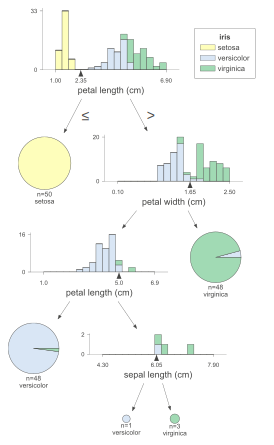

In [57]:
import dtreeviz

viz_model = dtreeviz.model(classifier,
                           X_train=x, y_train=y,
                           feature_names=iris.feature_names,
                           target_name='iris',
                           class_names=iris.target_names)

viz_model.view()

In [58]:
viz = viz_model.view()
viz.save("decision_tree_flow.svg") 

#### Set Attachment Fact

In [59]:
watsonx_ai_model.set_attachment_fact(file_to_upload="decision_tree_flow.svg", description="Decision tree flow",phase_name = "validate", fact_id="decision_tree_flow")

2023/10/05 14:17:50 INFO : Attachment uploaded successfully and access url (15min valid) is - https://cpd-aigov.apps.fs-480-dev.cp.fyre.ibm.com/v2/asset_files/b760dca1-979f-403f-b8a6-923928f6dc5b/54e5499d-753e-4c15-b4e4-8a70cd263fc2/8bcbd253-cbda-4433-b18c-200b31097f30?project_id=55f80411-ed6b-4bca-8655-0d32d37f7df1&signature=gcm-4g5iYVxGipzXPlJ%2FHMhPrg%3D%3D%3Bn6M48%2BtMaQj%2FsntgVQVq%2FA%3D%3D%3AvALWfcRFYD4r3vthSnOQFqMM1f0Laxmez%2FW6z6A4MP00o7EUHNfMVepwZlzovVT8HW2SEuoy%2B019Pyo%2BqnEEc2q19O7nBn8EjFrjtnROkiE7KP%2BrIl1Iv4MfLgVvnoyJUQ9v0V%2B7%2F8fFSTGmDgmUfzIm24Xy1MgZRXdogzYkOQ8ObuY02r0k1qQgHFo%2BUXKZ56mqMuvLwhn4qgg%2FhQcf0miFU8S4KhGB%2Bo1fTZ%2ByqlDh%2BLiLa4dOs5kw0YuN2zW%2FHFCBKMSf%2Fmq25ZNRb8B4A5Btq2eYZJr1GZnc4HSbPZidszYakNKUDwGHoAz4OuAk5Ne9Jel3rmkS24ITFcKBliPhXypz5i%2F0hniTt3efxbSOkBP6aa4xd6YgBqR0Rg%3D%3D


#### <span style="color: gold;">Example2:</span> Horizontal view of decision flow

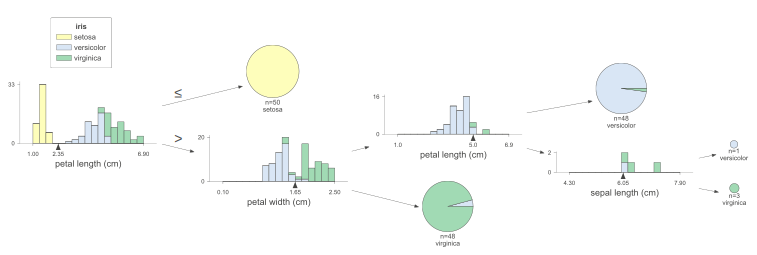

In [60]:
viz_model.view(orientation="LR")

In [61]:
viz = viz_model.view()
viz.save("decision_tree_horizontal_flow.svg") 

#### Set Attachment Fact

In [62]:
watsonx_ai_model.set_attachment_fact(file_to_upload="decision_tree_horizontal_flow.svg", description="Decision tree horizontal flow",fact_id="decision_tree_flow_hr")

2023/10/05 14:18:07 INFO : Attachment uploaded successfully and access url (15min valid) is - https://cpd-aigov.apps.fs-480-dev.cp.fyre.ibm.com/v2/asset_files/b760dca1-979f-403f-b8a6-923928f6dc5b/54e5499d-753e-4c15-b4e4-8a70cd263fc2/9db2c574-330f-412c-925f-3f240b86c48b?project_id=55f80411-ed6b-4bca-8655-0d32d37f7df1&signature=gcm-EGi4pdjFQZbv6L7Bu59org%3D%3D%3BThZRmnDVNIZlYUlp%2BK8O8Q%3D%3D%3AWhY6z9m24XftNyTb9F5MLS0RXlCZELjct3vOlUguIgw9udLDHXf5LlftlovgIEh2DYue%2FiGczD0XURzXWQbX%2F3ZNZS9FvJTInD5kiuP4ix7Hhxs4X3fyhrnbASTo7XrRexshY67mIc4ESwuxJfsWZXYQSFoTwzJns6T24%2BSPLMvT%2Fu%2FKvAk4eiZa1dE5uLdh1LIMDd8EQz59uTsuATcj5W%2FNYJkON3Fw8U%2BxnEfKazg4wDL5mT5f5TlpVYzXrdyB1GpuUYKYS0K7GPqf0JoAGz3zlWEcc6iLHHLxPXDkxBf4QNjBjAHGYl9Soy0oELSGrDd3Rp4H%2FYMm1%2Bwo5aO88lubCJdjIwqyHNqQ645CNDicShuCtx%2F%2FsE%2FQPFDGacE82uzIT3llxV6%2B


### List All Attachments for a Model <a name="attachmentlist"></a>

This section provides a detailed list of all attachments associated with a specific model. Attachments can include various files such as images, documents, and other relevant resources.


In [ ]:
watsonx_ai_model.list_attachments()

### Remove Attachments <a name="attachmentremove"></a>

This section guides you through the process of removing attachments from a model. You can delete any unnecessary or outdated files to keep your model organized and up-to-date.


In [ ]:
watsonx_ai_model.remove_attachment(fact_id="fact_vpfhfd")

#### -> Remove all attachments
Use this option to delete all attachments associated with the model. This action is irreversible, so ensure that you really want to remove all files before proceeding.


In [ ]:
watsonx_ai_model.remove_all_attachments()

## <span style="color:gold;"> AI usecase</span>






#### Retrieve Attachment Definitions for AI usecase

Displays all attachment fact definitions for a AI usecase, providing an overview of the available attachment types and their associated details.







In [ ]:
facts_client.assets.get_attachment_definitions(type_name="model_usecase")

#### Set Attachment Fact

Sets an attachment fact for a given AI usecase



In [ ]:
ai_usecase.set_attachment_fact(file_to_upload="confusion_metrix.png", description="Confusion Metrix", fact_id="fact_vpfhfd")

#### Handling Non-Existent `fact_id`

If the specified `fact_id` does not exist, the attachment will be added under the "Other Attachments" section. 

This ensures that all attachments are categorized, even when the `fact_id` is new or undefined.



In [ ]:
ai_usecase.set_attachment_fact(file_to_upload="confusion_metrix.png", description="Confusion Metrix", fact_id="metrix_exist")

#### Verify Existing Attachments for `fact_id`

Checks if the specified `fact_id` already has associated attachments. 

This ensures that you can determine whether an attachment is already linked to the given `fact_id` before adding new ones.



In [ ]:
ai_usecase.has_attachment(fact_id="fact_vpfhfd")

### List All Attachments for a  AI usecase <a name="attachmentlist"></a>

This section provides a detailed list of all attachments associated with a specific AI usecase. Attachments can include various files such as images, documents, and other relevant resources.


In [63]:
ai_usecase.list_attachments()

[{'attachment_id': '78d3979d-7b12-4101-8859-7b5c0ba9c53d',
  'description': 'Confusion Metrix',
  'name': 'confusion_metrix.jpg',
  'mime': 'image/jpg',
  'fact_id': 'fact_vpfhfd',
  'url': 'https://cpd-aigov.apps.fs-480-dev.cp.fyre.ibm.com/v2/asset_files/b760dca1-979f-403f-b8a6-923928f6dc5b/54e5499d-753e-4c15-b4e4-8a70cd263fc2/78d3979d-7b12-4101-8859-7b5c0ba9c53d?project_id=55f80411-ed6b-4bca-8655-0d32d37f7df1&signature=gcm-931m4KdrjHACFvZkcnkEQQ%3D%3D%3BjkH7XuQhenDWvEQT6rcO6g%3D%3D%3A3%2FP1yO4tLm3NlabnGSmY%2FbAQ%2ByOxO51GPOMWZ0c2VSDy%2BaOc9s6Q79LJtt5V%2FU8REyA2WltVUUzEhE%2BOQqlrQLI%2BB7cFOpY1SZgKywCpZGRj0REfHkFBAC0OG%2Fm3FkKUxr67DXEYYW1z9EnGxCumg5Q%2FIbCl4z3RZ6sEB4HsBHZ2t7X4fqDwcFTxkhooY8UaRI%2Fw8ypiRJmcFnx6jRVDjHyLaE51uTQQ0ujemQUPO%2BRSdZCNFY09lX2vDRRxoMqlRVgnboYf4maT8rG4E8PNNwEiDwMaJWVVc%2Bhc9BnLaiO%2BI4Y13sl31Maai5i4XILHskZvIcVx3qqOEKDGIzhXgrNt7WsSZYIDW7drnG5LF8AtR38xmtqCNA%3D%3D'},
 {'attachment_id': '8c7243e1-9330-4cd2-8ebe-5a268b6c1cc4',
  'description': 'Confusion Metrix',
  '

### Remove Attachments <a name="attachmentremove"></a>

This section guides you through the process of removing attachments from a AI usecase. You can delete any unnecessary or outdated files to keep your AI usecase organized and up-to-date.


In [64]:
ai_usecase.remove_attachment(fact_id="fact_vpfhfd")

2023/10/05 14:18:26 INFO : Deleted attachment for fact id: fact_vpfhfd successfully


#### -> Remove all attachments
Use this option to delete all attachments associated with the AI usecase. This action is irreversible, so ensure that you really want to remove all files before proceeding.


In [65]:
ai_usecase.remove_all_attachments()

---
## Cell Facts <a name="cellfacts"></a>

- **Automatic Output Capture**: Cell Facts automatically capture outputs from a cell, including print statements, tables, and images. It handles various types of content seamlessly.
  
- **HTML Conversion**: The captured outputs are converted into HTML snippet files. This conversion includes all text, tables, and images from the cell.

- **Attachment Support**: HTML snippet files can be uploaded as attachments. These files can be accessed later through the user interface.

- **User Interface Display**: In the user interface, these HTML files appear as clickable attachments. Users can view the content by clicking on these attachments.

- **Inline Report Rendering**: When included in reports, the HTML is rendered inline. This means that tables and other elements are displayed directly within the report, with proper formatting.

- **No Manual Saving Required**: There is no need for manual code to save outputs to files. Cell Facts automate this process, making it more efficient and less error-prone.




## <span style="color: gold;"> Model </span>

#### Capture Scatter Plot Visualization

The code snippet below creates and captures a scatter plot to visualize the training data for the Iris dataset

This cell captures the scatter plot as an HTML snippet, which can be included in reports or saved as an attachment for further use.

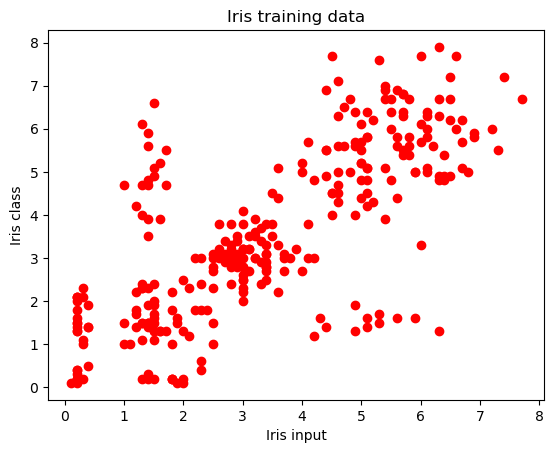

2023/10/05 14:18:27 INFO : Saved cell facts under: 


'/Users/shashidhar/1_1_Factsheet_Python/Notebooks/Notebooks_for_clients/PythonClient_all_features/captured_cell_facts/Captured_Cell_Output_a6p.html'

In [66]:
%%capture_cell_facts 

plt.scatter(x_train, x_test, color = 'red')
#plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Iris training data')
plt.xlabel('Iris input')
plt.ylabel('Iris class')
plt.show()

##### Saving Attachment for Training Data Visualization

In [67]:
time.sleep(4)

watsonx_ai_model.set_cell_attachment_fact(description="Training data visualization",fact_id="data_distribution")

2023/10/05 14:18:43 INFO : Cell facts attachment uploaded successfully and access url (15min valid) is - https://cpd-aigov.apps.fs-480-dev.cp.fyre.ibm.com/v2/asset_files/b760dca1-979f-403f-b8a6-923928f6dc5b/54e5499d-753e-4c15-b4e4-8a70cd263fc2/4307fe1f-04e2-49c9-b4c6-7267c717951b?project_id=55f80411-ed6b-4bca-8655-0d32d37f7df1&signature=gcm-DPhFIcRytwiP%2FIGga%2Bv4uQ%3D%3D%3BEfjMvm3HJDu17nyyYgpOsg%3D%3D%3AQG4MK6n1Vrh6vjM46KH2lNBU3%2FLtXT7r0rDxHIkAbsvjI%2FIQn4IuBC7dRHqAdxTzgrlv%2BfWEEC5gKIlJPWZ%2BYo0S8DUYg078ILK8UrR1ji%2B5QuN7kTZXyAdlcLelhLwJb0bOeb99S%2FNIkbGvPPZlmk6yoeBqgq35ISh%2BgL5j%2FVUSMIPuamOTnKOhvUXfTfFuReg9oPaJUxKC0%2Fc6GnZJaKSTAVgtVT6KbUNkWxHCPk770oyAfFitZ3hlv4jeVWt7iP0gbPH7xK6SjdPV1L2XDOvpD9a4l5AetsJ4Gbz6a2cXtU4Kv%2BbqCBWz5pTwfjZLGXq8SwHRBApv6M%2BxuUNxCss7t3ogfzu1GhqzBppUOYwNwZcgxvlwqGLtntOnooTfZFk7%2BXCKxTu%2BMqoYvzl8IQQEBAOSqTzlWZU5l9lGWkEJV26HQNEPn70%2F1m132vARJl6T5N61FskK7yUnFkXBE415BTCwaePfmKI3Z8NDEu%2B8CNjGQi8CQrsRZxUVa60%2FOu9KNoh0ewX50c%2FVfsmySv6Sz3J%2B


#### Capture Print Statements

This section demonstrates how to capture and save print statements from code cells

This cell captures the print statement as an HTML snippet, which can be included in reports or saved as an attachment for further use.

In [68]:
%%capture_cell_facts -po 
# capture print stmt only 

print("Working on Iris data")
print("Model trained")

Working on Iris data
Model trained
2023/10/05 14:18:43 INFO : Saved cell facts under: 


'/Users/shashidhar/1_1_Factsheet_Python/Notebooks/Notebooks_for_clients/PythonClient_all_features/captured_cell_facts/Captured_Cell_Output_es6.html'

##### Saving Attachment for Print Output


In [69]:
watsonx_ai_model.set_cell_attachment_fact(description="Print output",fact_id="print_store")

2023/10/05 14:18:56 INFO : Cell facts attachment uploaded successfully and access url (15min valid) is - https://cpd-aigov.apps.fs-480-dev.cp.fyre.ibm.com/v2/asset_files/b760dca1-979f-403f-b8a6-923928f6dc5b/54e5499d-753e-4c15-b4e4-8a70cd263fc2/7267d24a-ff39-47ca-86ee-cea75a6a5024?project_id=55f80411-ed6b-4bca-8655-0d32d37f7df1&signature=gcm-yG9ERy2tJ0T0fb2Hw2aPhg%3D%3D%3BZ5NOvOkqjXgXEU8RTIAKUg%3D%3D%3Aphr5d11oLaRwkcTYEHxVSnREH4h2zcUpn%2BReQINcUGRAE39%2F%2BI%2FYMgQJ6v4%2FWa85mANpneTyJZHJYr5oTmbrAEpjpBE4PLgHTf8cRy%2FSVRt3JI7tQ1xmplcvJ7JidKqIpVaEn1T%2BeubmrX92xdKjULgVvpVfXMiiImSSh6rUKPpF%2Brob9%2F9EGbwdY%2BWxDIvICI%2FXK7jgOunKLalRYXQ%2FXBodPkUk%2F3tyPNQBPs14X9n2f4Q8MAhmnOd0rvik63Me48PxoE80CNHo2CN9ZfBlE7Ok77Z7FUEzMGXss%2F938NrcwHh65Nc%2F78N7cBidhg0l0xoMgpBrArPPEanE%2BOtIZ0Pv7ZF%2Fn9uWjRUSNH4GMS4nwxdFXBqjmYkjb5O9U3y%2Br6jZvTs4Bo6sdn1ONH66CwTw5vbRrg5r44MpPWMh%2BeK00qpRylPt0mSkdqXGRLoVXodQ4Judtv%2F9q6YyGoWMKRj5UIcVbU3PJMvGwesFVT7S6dGafH8y83jb6yTUSBI8osJ21GcLT3TaTZruM%2B%2FbM6iShzHjjg%3D%3D


##### Capture Confusion Matrix

This section demonstrates how to capture and save a confusion matrix from your model's evaluation.

This cell captures the Confusion Matrix as an HTML snippet, which can be included in reports or saved as an attachment for further use.

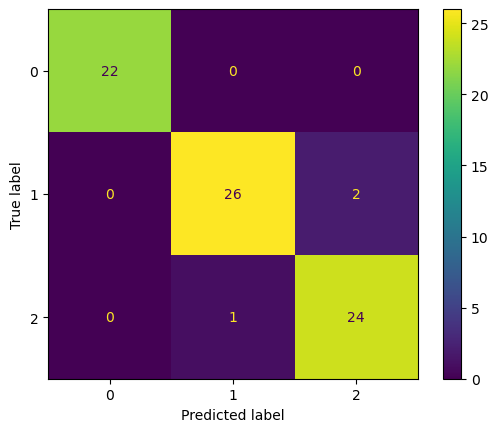

2023/10/05 14:18:56 INFO : Saved cell facts under: 


'/Users/shashidhar/1_1_Factsheet_Python/Notebooks/Notebooks_for_clients/PythonClient_all_features/captured_cell_facts/Captured_Cell_Output_pwl.html'

In [70]:
%%capture_cell_facts 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions1=classifier.predict(x_test)

cm1 = confusion_matrix(y_test, predictions1,labels=classifier.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=classifier.classes_)
disp1.plot()

plt.show()

##### Saving Attachment for Confusion metrix

In [71]:
time.sleep(2)

watsonx_ai_model.set_cell_attachment_fact(description="Confusion metrix",fact_id="con_metrix_store")

2023/10/05 14:19:11 INFO : Cell facts attachment uploaded successfully and access url (15min valid) is - https://cpd-aigov.apps.fs-480-dev.cp.fyre.ibm.com/v2/asset_files/b760dca1-979f-403f-b8a6-923928f6dc5b/54e5499d-753e-4c15-b4e4-8a70cd263fc2/936aad32-8b92-4546-9352-72e6e7e17c39?project_id=55f80411-ed6b-4bca-8655-0d32d37f7df1&signature=gcm-plqH7nSXZ1Q9lDyAhfhViw%3D%3D%3BKFabIkykXK3bArNtnhUiSQ%3D%3D%3A44c%2F8xS6iPHQ7SZHjBoBAjop%2BA%2B14MGka7ImYXxToqxmVdcHbnhuh2%2FzB1nUiuyu1iuTmppaEBSv2T28MZPZzTzjjb9bJ%2FOn%2BnklciCht1TKuQ2HgE57HX3rXmR73LOgu0jMnOSax4esRQ8vt0iSfsN2VwAIXKTgxDo5cUso7%2FHc8ldD5OTrIrVt4hVurPs1mhblB6veP2FWCgxI7gB%2FC4Jw7ULzpyOB%2BFnc1sjNIMTwmwFOEKPeO%2FOwaRh9iAXFspfcOqei8zMuqcgniVctfkq3%2BQakd49wkH7dAbNPRGr7xZuXIltCN2L9CEGLvkmy5qiflxw%2BGzp7WAD7HJax18wBOdqt4YelSmOHO8ItJnFiHagi0uvOsOgxo2CPywiLVmPRuXS7Z0mt5XkwZsqv2dcocDqaQ%2FRzSFPEiFKjSXlp5ZXCMVKVgFwZhEhoJtmS9ShIQCm5nEU%2FrRZceZC3gst6e%2B8CdNJcqxR2gv9eoPL3B71IHCaJ7tLTzz3kUyqcRMkAg7%2FP9jfcmnIByUpMUhMcoIJpAQ%3D%3D


#### Capture Feature Importance for an Instance

This section demonstrates how to capture feature importance for a specific instance using the `instance_feature_importance()` method

This cell captures the feature importance as an HTML snippet, which can be included in reports or saved as an attachment for further use.


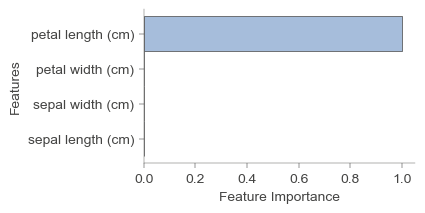

2023/10/05 14:19:11 INFO : Saved cell facts under: 


'/Users/shashidhar/1_1_Factsheet_Python/Notebooks/Notebooks_for_clients/PythonClient_all_features/captured_cell_facts/Captured_Cell_Output_s5a.html'

In [72]:
%%capture_cell_facts

viz_model.instance_feature_importance(y, figsize=(3.5,2))

##### Saving Attachment for Feature importance

In [73]:
time.sleep(4)

watsonx_ai_model.set_cell_attachment_fact(description="Feature importance",fact_id="feature_importance_fact_id")

2023/10/05 14:19:28 INFO : Cell facts attachment uploaded successfully and access url (15min valid) is - https://cpd-aigov.apps.fs-480-dev.cp.fyre.ibm.com/v2/asset_files/b760dca1-979f-403f-b8a6-923928f6dc5b/54e5499d-753e-4c15-b4e4-8a70cd263fc2/adb2bd16-8ff1-43dc-9601-745e41246f8d?project_id=55f80411-ed6b-4bca-8655-0d32d37f7df1&signature=gcm-nGvLZMUQ1XGfbQn9T5H8ZA%3D%3D%3Bek5x%2FGSIl6RABJCjJCAecw%3D%3D%3ARJnBP%2BfmLcyv9GorJweqSDkYXJy3zWMc3qV9KX66YEQ7GwpM3tBaaY4Yk1ZCYwHYYCAKuxHIyMMsoFRHbt8qFLC6bhKpM6YUUP5Eq%2FWtwiXfT2tEpDeLRnAvPNZ6boZFb0LeHrasEHk1BBj2bGMMfPu4%2B4Kt7uO2w9RSOxafowIFE%2FDr3wlzvwzs3darLXm7G%2FgqXSQ6Rc23UfhqMZTP2WovVu%2B9kQVT9M4BdPWOBta5KVCmO9VRX4EyTa33cIo2wEnDCJDp4cwXE0GcB8wno5svwhclEtHQa8GGH7h2Hymuyn504NtLZm%2F%2BXqqhm0WCeP20BlWrC%2BV2FA0jf2pujIJetxMWY%2F0bunqx3tDT2A5mVaqpstowiC7L46bu1L%2FDHwtBlMYjwOgs6JRaNdN57p8YjwdElwJylNMTsnLhGz%2BEKtLnIT7CxkYrHjLrw5vsu0ZUs6rOm5%2Ff5uLhk0mJfMsmleaIe%2Bt4rG0g8Y1%2FVHoHEUGsAMTgZ3qOGH1lzqFtDOHcxQbDm7%2Fsu9qnLZaQZFHth%2B9WBw%3D%3D


### Capture Statistics


This section demonstrates how to capture and visualize statistics for data analysis

This cell captures the statistics as an HTML snippet, which can be included in reports or saved as an attachment for further use.

In [74]:
%%capture_cell_facts

viz_model.node_stats(node_id=6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.0,1.0,1.0,1.0
mean,6.0,2.7,5.1,1.6
std,<NA>,<NA>,<NA>,<NA>
min,6.0,2.7,5.1,1.6
25%,6.0,2.7,5.1,1.6
50%,6.0,2.7,5.1,1.6
75%,6.0,2.7,5.1,1.6
max,6.0,2.7,5.1,1.6


2023/10/05 14:19:28 INFO : Saved cell facts under: 


'/Users/shashidhar/1_1_Factsheet_Python/Notebooks/Notebooks_for_clients/PythonClient_all_features/captured_cell_facts/Captured_Cell_Output_g14.html'

##### Saving Attachment for Data statistics

In [75]:
time.sleep(4)

watsonx_ai_model.set_cell_attachment_fact(description="Data statistics",fact_id="data_stat_fact_id")

2023/10/05 14:19:45 INFO : Cell facts attachment uploaded successfully and access url (15min valid) is - https://cpd-aigov.apps.fs-480-dev.cp.fyre.ibm.com/v2/asset_files/b760dca1-979f-403f-b8a6-923928f6dc5b/54e5499d-753e-4c15-b4e4-8a70cd263fc2/0bd8a7fe-b67a-434e-b58e-e992379a5016?project_id=55f80411-ed6b-4bca-8655-0d32d37f7df1&signature=gcm-8d0V2PQgmed0ll5iPd4TxQ%3D%3D%3Blg3Gxd8Jpa%2F%2B94zYOnsjpQ%3D%3D%3A0nvjb60MHjYIXB1acWp12U%2FcwJ0TV5nSKs6nNsx1T1qOoCkF87ipvexUfDADIxEBfNEQyUg5JnCFAwLVuJ79yLpIXFzVqsRRKNMZatmY5KS%2BoDvvbp0su2k%2By%2FEK8YQD28so8IpI9meeobmBlnmCBCIhuenIAfc3OwFtuND13%2BtKyDjfUaUWLVMTZdlFVd1e%2Fzl3TisSKEWTJoNfif1zQ2M4ChUM%2BEi7at186Qryqgu22SEwuiC1UsFEIlcVAmO0SJbTjbIPSUk%2Fxvchm2MEpMBW0CoLn0URAYrIxmuSCYEQ%2FRuBALwPur1rK6D4gF7Es6XPNmlTauf2ZrtiS5GdzhyE0T97RPxJnP3LooXmRFYKqOi9jhgQLTCMnNYl9KPYHBwGVeFMoCRBM5ECUTMj%2F9JVZXb2WMLhw4belauPAhYqxgH05fgJ6qTi1jA72KR6MHpvk0hc%2BAnFBe50BQZpnivJyJ%2BCySS%2FESOoOOafAeGN3B2NCmLK5mEAwjMQAhgL5Bp9HeS02E6Gr68dF7wCRk1qAXTSFg%3D%3D


#### List all attachments for a model

In [76]:
watsonx_ai_model.list_attachments()

[{'attachment_id': '8c7243e1-9330-4cd2-8ebe-5a268b6c1cc4',
  'description': 'Confusion Metrix',
  'name': 'confusion_metrix.jpg',
  'mime': 'image/jpg',
  'fact_id': 'metrix_exist',
  'url': 'https://cpd-aigov.apps.fs-480-dev.cp.fyre.ibm.com/v2/asset_files/b760dca1-979f-403f-b8a6-923928f6dc5b/54e5499d-753e-4c15-b4e4-8a70cd263fc2/8c7243e1-9330-4cd2-8ebe-5a268b6c1cc4?project_id=55f80411-ed6b-4bca-8655-0d32d37f7df1&signature=gcm-4p3szYoraUCejM1OciSsOw%3D%3D%3BkEM%2FPsx%2FJIwmZ%2BzXh3bVVw%3D%3D%3Ai2XQg6jzvK18kL4XAXBPoCvUk%2F5Bf61ihyyJ60d4jw0WMqnFgDW3vr56vn7hesxUyQKCUe66Ko2vJ3wo0Xg3uZFPztMX9f1RhJv9L6T%2BVTWwf2Ys78JWG2t9kPy9rWIY%2FME6u7X%2BdGtWP%2FWLFojAxLDOdSa%2BWkka1VfESrJ1Qn%2BeK1QLg8h4M0NGjD0NXvNOYRJ60O30FOoVLBHZSJzUTTTmn3Ce8yR%2F3iro07yTp8vGkOQ87MqPs%2FzEfUxTWhOnRHbnWCAzumUj0nbmcJaUdN2vFXohd47xsYC1UfhnpP4fvo7tM2VdaSol7hqTxiMLkr11XcSJonLyanu4xIgx5JoiflDyy5v7dOqFzj6H1rA9cjxqrKcu'},
 {'attachment_id': '8bcbd253-cbda-4433-b18c-200b31097f30',
  'description': 'Decision tree flow',
  'name': 

## <span style="color: gold;"> AI usecase </span>

#### Capture Scatter Plot Visualization

The code snippet below creates and captures a scatter plot to visualize the training data for the Iris dataset

This cell captures the scatter plot as an HTML snippet, which can be included in reports or saved as an attachment for further use.

In [ ]:
%%capture_cell_facts 

plt.scatter(x_train, x_test, color = 'red')
#plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Iris training data')
plt.xlabel('Iris input')
plt.ylabel('Iris class')
plt.show()

##### Saving Attachment for Training Data Visualization

In [ ]:
time.sleep(4)

ai_usecase.set_cell_attachment_fact(description="Training data visualization",fact_id="data_distribution")

#### Capture Print Statements

This section demonstrates how to capture and save print statements from code cells

This cell captures the print statement as an HTML snippet, which can be included in reports or saved as an attachment for further use.

In [ ]:
%%capture_cell_facts -po 
# capture print stmt only 

print("Working on Iris data")
print("Model trained")

##### Saving Attachment for Print Output


In [ ]:
ai_usecase.set_cell_attachment_fact(description="Print output",fact_id="print_store")

##### Capture Confusion Matrix

This section demonstrates how to capture and save a confusion matrix from your model's evaluation.

This cell captures the Confusion Matrix as an HTML snippet, which can be included in reports or saved as an attachment for further use.

In [ ]:
%%capture_cell_facts 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions1=classifier.predict(x_test)

cm1 = confusion_matrix(y_test, predictions1,labels=classifier.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=classifier.classes_)
disp1.plot()

plt.show()

##### Saving Attachment for Confusion metrix

In [ ]:
time.sleep(2)

ai_usecase.set_cell_attachment_fact(description="Confusion metrix",fact_id="con_metrix_store")

#### Capture Feature Importance for an Instance

This section demonstrates how to capture feature importance for a specific instance using the `instance_feature_importance()` method

This cell captures the feature importance as an HTML snippet, which can be included in reports or saved as an attachment for further use.


In [ ]:
%%capture_cell_facts

viz_model.instance_feature_importance(y, figsize=(3.5,2))

##### Saving Attachment for Feature importance

In [ ]:
time.sleep(4)

ai_usecase.set_cell_attachment_fact(description="Feature importance",fact_id="feature_importance_fact_id")

### Capture Statistics


This section demonstrates how to capture and visualize statistics for data analysis

This cell captures the statistics as an HTML snippet, which can be included in reports or saved as an attachment for further use.

In [ ]:
%%capture_cell_facts

viz_model.node_stats(node_id=6)

##### Saving Attachment for Data statistics

In [ ]:
time.sleep(4)

ai_usecase.set_cell_attachment_fact(description="Data statistics",fact_id="data_stat_fact_id")

#### List all attachments for a AI usecase

In [ ]:
ai_usecase.list_attachments()

---
## Create an Approach <a href="#createapproach"></a>

- Track multiple models and prompts under a single use case by grouping them into different approaches.
- Create multiple approaches for various classification algorithms to facilitate comparison and integration.
- Use approaches to manage different models that need to be combined for a specific use case.



For more information, refer to the [Approach Documentation](https://s3.us.cloud-object-storage.appdomain.cloud/aifactsheets-client/doc_files/asset_model/Model%20Usecase/Model%20Usecase%20Approach.html)


In [81]:
iris_approach =ai_usecase.create_approach(name="Iris classification",description="approach for iris data",icon="Sprout",color="Teal")
iris_approach.get_info()

2023/10/05 14:20:31 INFO : Approach created successfully


{'approach_id': '25934a0d-7429-464f-a631-dd4b83f75c6c',
 'approach_name': 'approach',
 'approach_desc': 'approach for iris data',
 'model_asset_id': 'c0e9f5ba-13af-4193-9821-8de9d51ea7af',
 'model_container_type': 'catalog',
 'model_container_id': 'b54179b3-d6f9-4886-bd48-a248c60d1f36'}

---
## Track a Model Under an AI Use Case <a name="add_mu"></a>

- **AI Use Cases** are designed to monitor the lifecycle of model assets across various stages, including development, pre-production, and production.
- To effectively integrate a model into an AI use case, three critical elements must be addressed: the **model**, the **AI use case**, and the **approach**.
- Link an existing AI use case by using the following method: `model.track(usecase=<ai_usecase>, approach=<approach1>, version_number="<Version Number>")`.

- **Version Numbers** are categorized as follows:
    - **Major Version:** Indicates significant changes, represented as `1.0.0`.
    - **Minor Version:** Reflects incremental improvements, represented as `0.1.0`.
    - **Patch Version:** Denotes minor fixes or updates, represented as `0.0.1`.
    - **Custom Version:** Allows for tailored versioning according to specific user needs.

- Ensure that the `ai_usecase`, `approach`, and `version_number` parameters are provided as mandatory.


For more information, refer to the [Governing AI Assets](https://s3.us.cloud-object-storage.appdomain.cloud/aifactsheets-client/doc_files/AIGov/Tracking%20models%20with%20AI%20Factsheets.html)


In [97]:
watsonx_ai_model.track(usecase=ai_usecase,approach=iris_approach,version_number="major",version_comment="major update to previous version")

2023/10/05 14:21:29 INFO : Initiate linking model to existing model use case c0e9f5ba-13af-4193-9821-8de9d51ea7af
2023/10/05 14:21:33 INFO : Successfully finished linking Model 54e5499d-753e-4c15-b4e4-8a70cd263fc2 to model use case


{'model_entry_catalog_id': 'b54179b3-d6f9-4886-bd48-a248c60d1f36',
 'model_entry_id': 'c0e9f5ba-13af-4193-9821-8de9d51ea7af',
 'model_entry_name': 'iris_model_usecase',
 'model_entry_status': 'draft',
 'version_number': '1.0.0',
 'version_comment': None,
 'approach_name': 'approach'}

#### Retrieve Tracked Models for Use Case

- Fetch all models that are currently tracked under a specified AI use case.
- This provides an overview of all models associated with the use case, facilitating management and analysis.


In [98]:
ai_usecase.get_tracked_models()

[{'id': '54e5499d-753e-4c15-b4e4-8a70cd263fc2',
  'name': 'Iris_model',
  'type': 'wml_model',
  'container_id': '55f80411-ed6b-4bca-8655-0d32d37f7df1',
  'container_name': 'test1_project',
  'container_type': 'project',
  'is_deleted': False,
  'master_id': '54e5499d-753e-4c15-b4e4-8a70cd263fc2',
  'model_identity_key': '36f6bcf1-618f-4757-9c98-dc7865a1572a',
  'source_asset_id': '',
  'algorithm': '',
  'version_details': {'number': '1.0.0',
   'approach_id': '25934a0d-7429-464f-a631-dd4b83f75c6c'}}]

---
## Untrack a Model

Remove a model from an AI use case when it is no longer relevant or needs to be managed separately.


In [102]:
watsonx_ai_model.untrack()

2023/10/05 14:21:39 INFO : Successfully finished unregistering WKC Model 54e5499d-753e-4c15-b4e4-8a70cd263fc2 from model use case.


## Cleanup<a href="#clean"></a>

In [ ]:
if run_cleanup_at_end:
    facts_client.assets.remove_asset(asset_id=ai_usecase.get_info()["model_usecase_id"],container_type=ai_usecase.get_info()["container_type"],container_id=ai_usecase.get_info()["catalog_id"])
    facts_client.assets.remove_asset(asset_id=watsonx_ai_model.get_info()["asset_id"],container_type=watsonx_ai_model.get_info()["container_type"],container_id=watsonx_ai_model.get_info()["container_id"])

else:
    
    model_ui_url = watsonx_ai_model.get_info(verbose=True)["url"]
    display(Markdown("[Click here to see the created wml model details in UI](" + model_ui_url + ")"))
    model_usecase_ui_url = ai_usecase.get_info(verbose=True)["url"]
    display(Markdown("[Click here to see the created model use case in UI](" + model_usecase_ui_url + ")"))

**Created by:**  


IBM watsonx.governance - *AI Factsheet Python SDK Team*

---

**Copyright © 2022-2024 IBM**  
Released under the [Apache 2.0 License](https://www.apache.org/licenses/LICENSE-2.0).
